In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
%matplotlib inline

/Users/tjbay/anaconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


https://www.kaggle.com/datamunge/sign-language-mnist

In [2]:
def rps_load_data(filename):
    df = pd.read_csv(filename, delimiter=',')
    df = df[df['label'].isin([0,1,21])]
    df.replace({"label":21}, 2, inplace=True) 
    labels = df.pop('label')  #Pops the label column and stores in 'labels'
    labels = to_categorical(labels)
    data = df.values
    data = np.array([np.reshape(i, (28,28)) for i in data])
    data = data.reshape(data.shape[0], 28,28,1)
    data = data / 255
    return data, labels

In [3]:
train_data, train_labels = rps_load_data("data/sign-language-mnist/sign_mnist_train.csv")
test_data, test_labels = rps_load_data("data/sign-language-mnist/sign_mnist_test.csv")

In [4]:
#Libraries for implementing a CNN
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical

In [22]:
#Building Our CNN
network = Sequential()
network.add(Conv2D(16, (3,3), input_shape=(28,28,1), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Conv2D(32, (3,3), activation='relu'))
network.add(Flatten())
network.add(Dense(128, activation='relu'))
network.add(Dropout(0.5))
network.add(Dense(25, activation='softmax'))
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
flatten_5 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               36992     
__________

In [23]:
network.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Code for Training our Model
history = network.fit(train_data, train_labels, epochs=12, batch_size=512)

Epoch 1/12
27455/27455 [==============================] - 10s 370us/step - loss: 3.0896 - acc: 0.0883
Epoch 2/12
27455/27455 [==============================] - 10s 376us/step - loss: 2.3395 - acc: 0.2639
Epoch 3/12
27455/27455 [==============================] - 13s 470us/step - loss: 1.6821 - acc: 0.4574
Epoch 4/12
27455/27455 [==============================] - 10s 358us/step - loss: 1.2787 - acc: 0.5753
Epoch 5/12
27455/27455 [==============================] - 10s 363us/step - loss: 1.0276 - acc: 0.6561
Epoch 6/12
27455/27455 [==============================] - 11s 399us/step - loss: 0.8577 - acc: 0.7080
Epoch 7/12
27455/27455 [==============================] - 9s 346us/step - loss: 0.7249 - acc: 0.7532
Epoch 8/12
27455/27455 [==============================] - 9s 342us/step - loss: 0.6109 - acc: 0.7941
Epoch 9/12
27455/27455 [==============================] - 10s 368us/step - loss: 0.5350 - acc: 0.8169
Epoch 10/12
27455/27455 [==============================] - 11s 398us/step - loss: 0.

In [24]:
test_loss, test_acc = network.evaluate(test_data, test_labels)
print('test_acc:', test_acc)

7172/7172 [==============================] - 1s 188us/step
test_acc: 0.8799498047964306


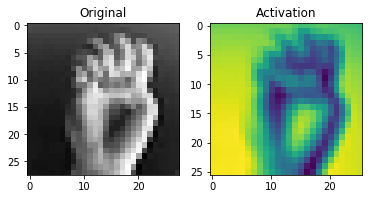

In [26]:
image_number = 15
plt.subplot(1,2,1)
plt.imshow(test_data[image_number].reshape((28,28)), cmap='Greys');
plt.title("Original")
plt.subplot(1,2,2)
activations = activation_model.predict(test_data[image_number].reshape((1,28,28,1)))
plt.imshow(activations[0][0, :, :, 5])
plt.title("Activation")
plt.show();

In [27]:
from keras import models

In [30]:
layer_outputs = [network.layers[i].output for i in [0,2,4]]
activation_model = models.Model(inputs=network.input, outputs=layer_outputs)
activations = activation_model.predict(test_data[image_number].reshape((1,28,28,1)))
layer_names = [ network.layers[i].name for i in [0,2,4]]
layer_names

['conv2d_11', 'conv2d_12', 'conv2d_13']

/Users/tjbay/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


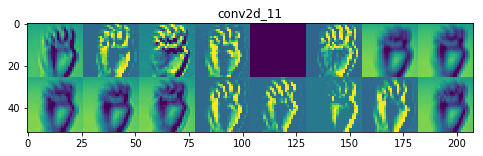

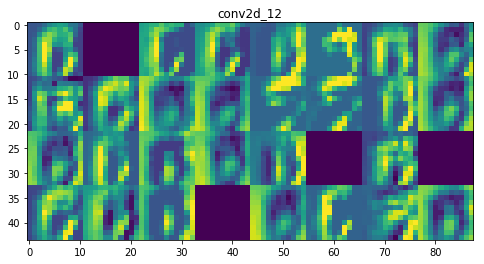

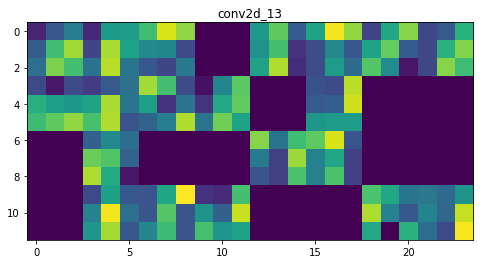

In [31]:
images_per_row = 8

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()